In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
iris = np.loadtxt('iris.csv', delimiter=',', dtype=str)
sepal_length = np.array(iris[1:, 0], dtype=np.float64)
sepal_width = np.array(iris[1:, 1], dtype=np.float64)
petal_length = np.array(iris[1:, 2], dtype=np.float64)
petal_width = np.array(iris[1:, 3], dtype=np.float64)

In [31]:
class KMeans:
  centroids=[]
  clusters=[]

  def __init__(self,n_clusters=3) :
    self.n_clusters=n_clusters
    self.centroid=[]
    self.clusters=[]

  def fit(self,data):
    X=data
    k=self.n_clusters
    self.centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    while True:
      # self.clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
      self.clusters = np.array([np.argmin([np.sqrt(np.sum((point - c) ** 2)) for c in self.centroids])for point in X])

      new_centroids = np.array([X[self.clusters == i].mean(axis=0) for i in range(k)])
      if np.all(self.centroids == new_centroids):
          break
      self.centroids = new_centroids




In [32]:
  def visualize_clusters(X, labels, clusters):
       if X.shape[1] == 3:
           fig = plt.figure()
           ax = fig.add_subplot(111, projection='3d')
           ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
           ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c='red', s=500, marker='x')
           ax.set_xlabel('X')
           ax.set_ylabel('Y')
           ax.set_zlabel('Z')
       else:
           plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
           plt.scatter(clusters[:, 0], clusters[:, 1], c='red', s=200, marker='x')
       plt.show()

In [33]:
x1 = sepal_length
x2 = sepal_width
x3 = petal_length
x4 = petal_width

In [34]:
data=np.array([x1,x2,x3,x4]).T
k=KMeans(3)
k.fit(data)
print(k.centroids, k.clusters)

[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


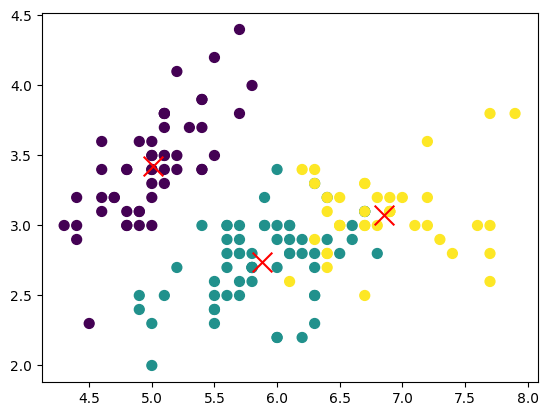

In [35]:
visualize_clusters(data, k.clusters,k.centroids)

In [36]:
data=np.array([x1,x2,x3]).T
k=KMeans(3)
k.fit(data)
print(k.centroids, k.clusters)

[[6.8525     3.07       5.6925    ]
 [5.006      3.428      1.462     ]
 [5.86833333 2.74       4.38166667]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


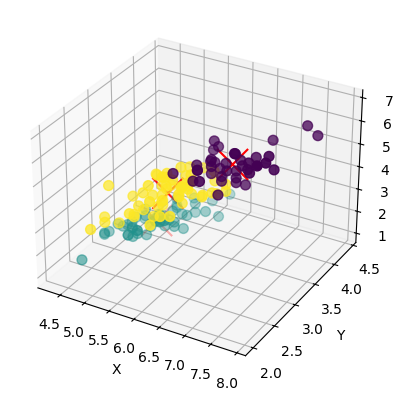

In [37]:
visualize_clusters(data, k.clusters,k.centroids)